In [2]:
# notebook last tested with abtem version 1.0.0beta6

from abtem import __version__
print('current version:', __version__)

from abtem.waves import PlaneWave
from abtem.potentials import Potential
from abtem.transfer import CTF
from abtem.plot import show_atoms
from ase.io import read

current version: 1.0.0beta5


# Basic HRTEM simulation

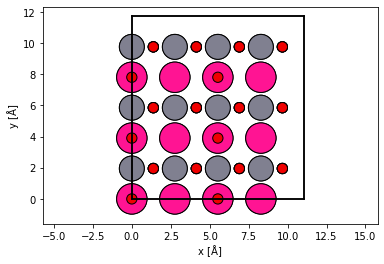

In [2]:
atoms = read('data/srtio3_110.cif')

show_atoms(atoms)

In [3]:
wave = PlaneWave(
    energy=300e3 # acceleration voltage in eV
)

potential = Potential(atoms, sampling=.03)

exit_wave = wave.multislice(potential)

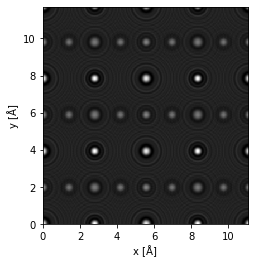

In [4]:
exit_wave.show()

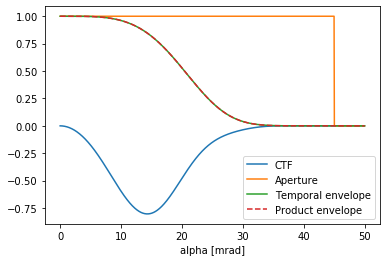

In [5]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 45, # mrad
    focal_spread = 25, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

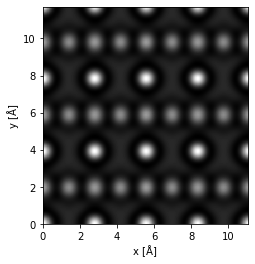

In [6]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.show()

In [7]:
# get image intensity as array

image_wave.intensity().array

array([[[2.1239939, 2.1163318, 2.0936065, ..., 2.0565817, 2.0936062,
         2.1163318],
        [2.1162796, 2.1086617, 2.0860653, ..., 2.0492506, 2.0860648,
         2.108662 ],
        [2.0934   , 2.0859103, 2.0636973, ..., 2.0275035, 2.063696 ,
         2.0859106],
        ...,
        [2.0561204, 2.0488405, 2.0272484, ..., 1.9920646, 2.0272477,
         2.0488408],
        [2.0934   , 2.0859103, 2.0636969, ..., 2.0275035, 2.0636964,
         2.0859103],
        [2.1162798, 2.1086617, 2.0860653, ..., 2.0492506, 2.086065 ,
         2.1086614]]], dtype=float32)